In [19]:
import tensorflow as tf  #ensorFlow is an open-source library for machine learning and deep learning. You use TensorFlow to build, train, and deploy machine learning models.
import numpy as np #numpy is used to handle data structures like arrays and matrices, and it provides functions for mathematical operations. In this context, it's typically used for working with arrays of data.
from tensorflow.keras.datasets import imdb #The imdb dataset contains 25,000 movie reviews labeled as positive or negative. This dataset is pre-split into training and test data. You can load it with the load_data() function for binary classification problems.
from tensorflow.keras.preprocessing.sequence import pad_sequences #he IMDB dataset consists of movie reviews represented as sequences of integers. Since each review may have a different length, you use pad_sequences to ensure all input sequences have the same length by padding shorter sequences with zeros.
from tensorflow.keras.models import Sequential #The Sequential model is a linear stack of layers, where you add layers one by one in sequence. It is the simplest type of model in Keras for most cases.
from tensorflow.keras.layers import Embedding,Dense,GlobalAveragePooling1D
#Embedding Layer:
#Purpose: This layer is used to create word embeddings for the input text. It converts integer sequences (representing words) into dense vectors of fixed size.

#Dense Layer:
#Purpose: The Dense layer is a fully connected layer in which each neuron is connected to every neuron in the previous layer. It is used to create the final output layer and any hidden layers in the neural network.

#GlobalAveragePooling1D Layer:
#Purpose: This layer is typically used to reduce the spatial dimensions of the input by taking the average of all the values along the sequence. It is commonly used in text classification models after the embedding or convolutional layers.

In [27]:
vocab_size=10000 #This variable defines the maximum number of words to be considered in the dataset. By setting vocab_size = 10000, you're restricting the dataset to only the top 10,000 most frequent words in the IMDB dataset.


(X_train,y_train),(X_test,y_test)=imdb.load_data(num_words=vocab_size)

#x_train and x_test are lists of integers that represent the movie reviews. Each review is converted into a sequence of integers, where each integer represents a unique word (from the vocabulary of the dataset).

#y_train and y_test are the labels corresponding to the reviews: 0 for negative reviews and 1 for positive reviews.

In [28]:
max_length=500 #Sets the desired length for each review. Any review longer than 500 words will be truncated, and any shorter review will be padded with zeros (by default) at the beginning.
X_train=pad_sequences(X_train,maxlen=max_length) #Pads or truncates the training data (x_train) so that each review becomes a sequence of exactly 500 integers (word indices).
x_test=pad_sequences(X_test,maxlen=max_length)

In [29]:
model=Sequential()
model.add(Embedding(input_dim=vocab_size,output_dim=32)) #input_dim=vocab_size: Size of the vocabulary (10,000 most frequent words).
# output_dim=32: Each word index will be mapped to a 32-dimensional dense vector.

model.add(GlobalAveragePooling1D()) #Averages the 32-dimensional word vectors across the 500-token input.
#Reduces the output to a fixed-size vector regardless of input length.
#This is simpler and faster than using an LSTM/GRU or CNN.

model.add(Dense(16,activation='relu')) #ReLU activation for non-linearity. Learns complex combinations of the word embeddings.

model.add(Dense(1,activation='sigmoid')) # neuron (because this is binary classification). sigmoid activation outputs a probability between 0 and 1. Predicts the probability that a review is positive (1) or negative (0).

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2)


Epoch 1/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 64ms/step - accuracy: 0.5204 - loss: 0.6918 - val_accuracy: 0.5452 - val_loss: 0.6855
Epoch 2/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - accuracy: 0.6024 - loss: 0.6798 - val_accuracy: 0.6124 - val_loss: 0.6647
Epoch 3/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 71ms/step - accuracy: 0.6122 - loss: 0.6618 - val_accuracy: 0.7158 - val_loss: 0.6313
Epoch 4/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7290 - loss: 0.6196 - val_accuracy: 0.7756 - val_loss: 0.5823
Epoch 5/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.7670 - loss: 0.5694 - val_accuracy: 0.7502 - val_loss: 0.5372
Epoch 6/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 66ms/step - accuracy: 0.7949 - loss: 0.5161 - val_accuracy: 0.7900 - val_loss: 0.4867
Epoch 7/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.8347 - loss: 0.4577 - val_accuracy: 0.7922 - val_loss: 0.4550
Epoch 8/10
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 47ms/step - accuracy: 0.8265 - loss: 0.4285 - val_accuracy: 0.8218 - v

In [36]:
results=model.evaluate(x_test,y_test)
print(f'Test Accuracy::{results[1]}')

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8571 - loss: 0.3735
Test Accuracy::0.8569599986076355


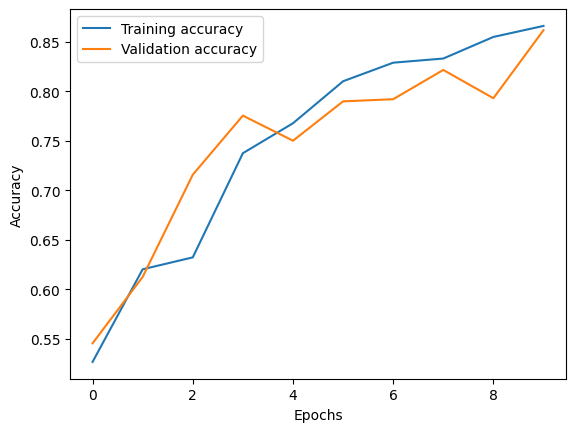

In [38]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],label="Training accuracy")
plt.plot(history.history['val_accuracy'],label="Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()